In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numeric import *

# Mosaicos

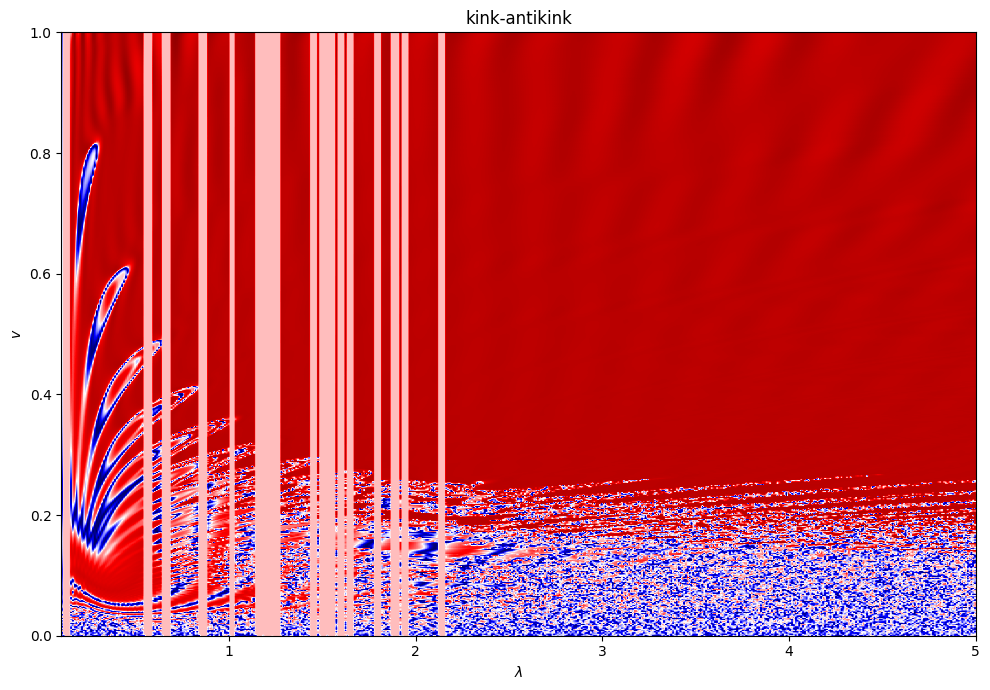

In [2]:
with open('phi4-scan.npy', 'rb') as file:
        mosaic = np.load(file)

plt.figure(figsize=(10, 7))
plt.imshow(mosaic, origin='lower', aspect='auto', cmap='seismic', extent=(0.1, 5, 0, 1), interpolation=None)
plt.ylabel(r'$v$')
plt.xlabel(r'$\lambda$')
plt.title('kink-antikink')
plt.tight_layout()

# plt.axvline(2, c='k')
# plt.ylim(0, 0.6)
# plt.xlim(0.775, 0.85)

plt.show()

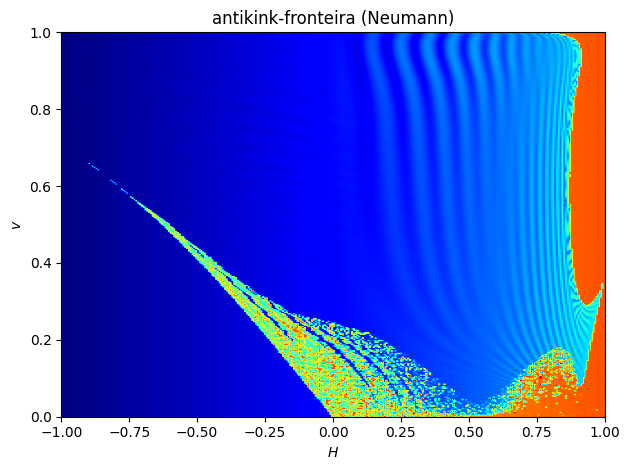

In [3]:
with open('phi4-neumann-scan.npy', 'rb') as file:
        mosaic = np.load(file)

plt.imshow(mosaic, origin='lower', aspect='auto', cmap='jet', extent=(-1, 1, 0, 1))
plt.ylabel(r'$v$')
plt.xlabel(r'$H$')
plt.title('antikink-fronteira (Neumann)')

plt.tight_layout()

# kink-antikink

In [8]:
L = 40
N = 1024
DX = 2*L/(N - 1)
DT = 4e-2
X0 = 10

def plot_phi4(scale, v):
    phi4 = Phi4(scale=scale)
    def y0(x, v):
        return np.stack((
            phi4.kink(x + X0, 0, v) - phi4.kink(x - X0, 0, -v) - 1,
            phi4.kink_dt(x + X0, 0, v) - phi4.kink_dt(x - X0, 0, -v)
        ))

    collider = Collider(
        x_lattice= (-L, L, N),
        dt= DT, 
        order= 4,
        y0= y0,
        pot_diff= phi4.diff
    )

    lat, Y = collider.run(X0/v + 2*L, v=v)
    plt.imshow(Y[:, 0], vmin=-1.25, vmax=1.25, aspect='auto', cmap='seismic', origin='lower', extent=lat.extent('x', 't'))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$t$')
    plt.title(r'$\lambda=%s, v=%s$'%(scale, v))
    plt.tight_layout()

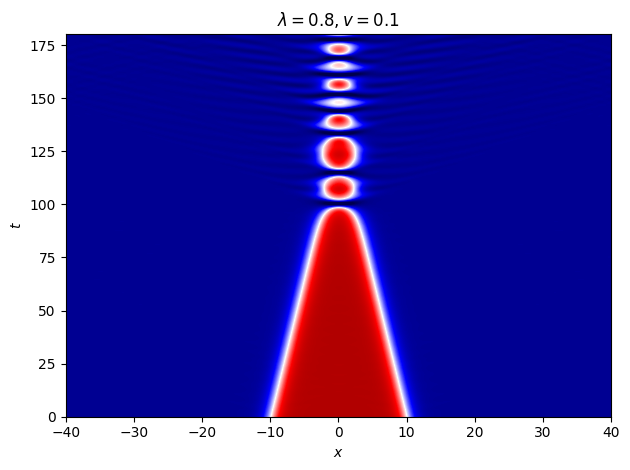

In [14]:
plot_phi4(scale=0.8, v=0.1)

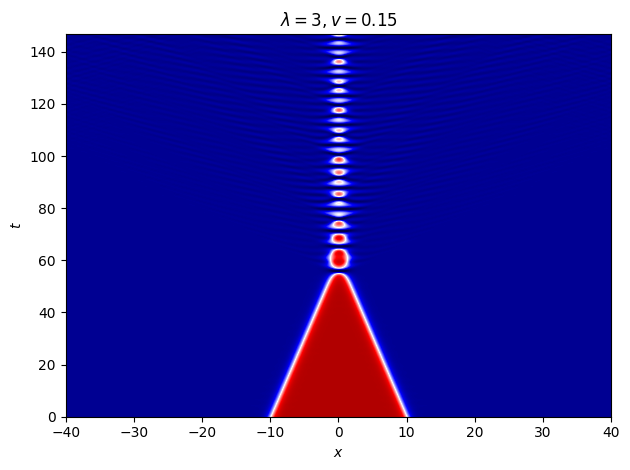

In [6]:
plot_phi4(3, 0.15)

# Antikink-fronteira

In [7]:
from math import acosh, asinh

L = 100
N = 1024
DX = L/(N - 1)
DT = 4e-2
X0 = 10

phi4 = Phi4(scale=2)

def y0(x, v, H):
    a = 1/sqrt(abs(H))
    return np.stack((
        (np.tanh(x - acosh(a)) if H > 0 else 1/np.tanh(x - asinh(a))) - phi4.kink(x + X0, 0, v) + 1,
        -phi4.kink_dt(x + X0, 0, v)
    ))

collider = Collider(
    x_lattice= (-L, 0, N),
    dt= DT, 
    order= 4,
    y0= y0,
    pot_diff= phi4.diff,
    boundaries=('reflective', 'neumann'),
    integrator='sy6'
)

def plot_phi4_naumann(H, v):
    collider.rb.param = -DX*H

    lat, Y = collider.run(X0/v + L, v=v, H=H)
    plt.imshow(Y[:, 0], vmin=-1.25, vmax=1.25, aspect='auto', cmap='seismic', origin='lower', extent=lat.extent('x', 't'))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$t$')
    plt.title(r'$H=%s, v=%s$'%(H, v))
    plt.tight_layout()

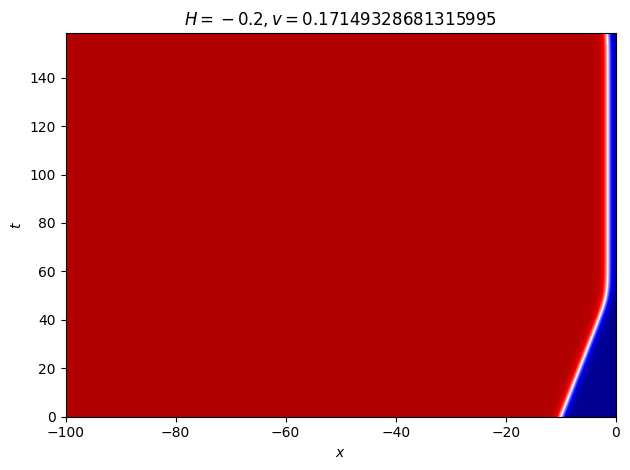

In [8]:
plot_phi4_naumann(H=-0.2, v=0.17149328681315995)

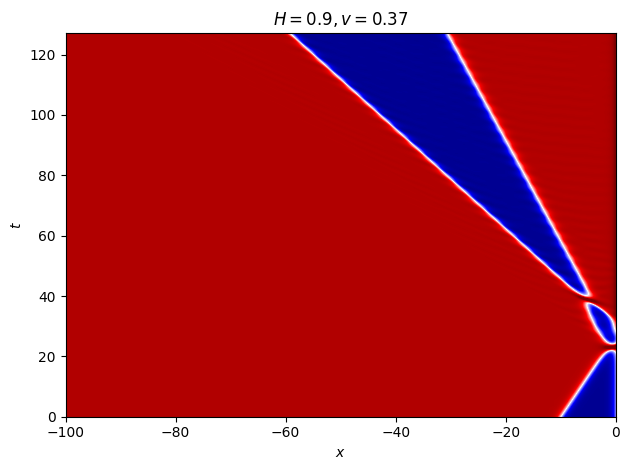

In [9]:
plot_phi4_naumann(H=0.9, v=0.37)

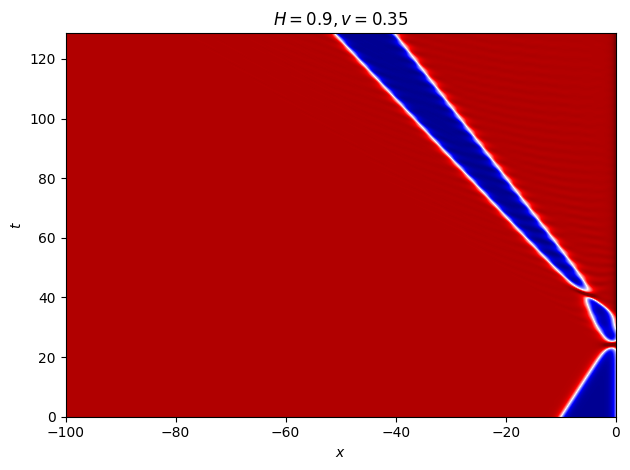

In [10]:
plot_phi4_naumann(H=0.9, v=0.35)

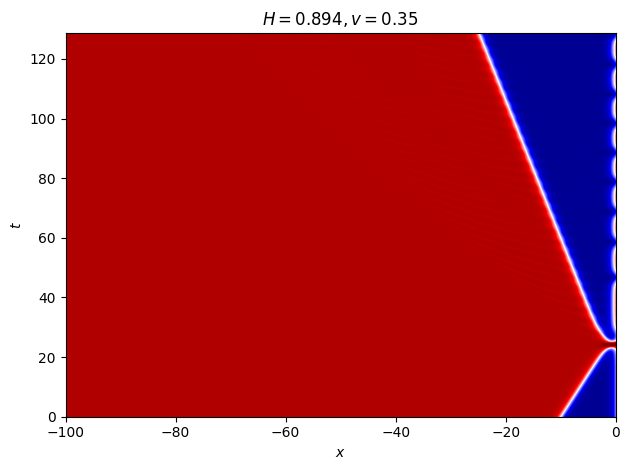

In [11]:
plot_phi4_naumann(H=0.894, v=0.35)